# Group Project IronKaggle

Initaials:

In [139]:
import pandas as pd
import warnings
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score


# DATA PROCESSING

Loading the data:

In [140]:
df_sales = pd.read_csv("sales.csv", delimiter=",")
df_sales[0:5]

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


Checking the structure and size:

In [141]:
df_sales.describe

<bound method NDFrame.describe of         Unnamed: 0  store_ID  day_of_week        date  nb_customers_on_day  \
0           425390       366            4  2013-04-18                  517   
1           291687       394            6  2015-04-11                  694   
2           411278       807            4  2013-08-29                  970   
3           664714       802            2  2013-05-28                  473   
4           540835       726            4  2013-10-10                 1068   
...            ...       ...          ...         ...                  ...   
640835      359783       409            6  2013-10-26                  483   
640836      152315        97            1  2014-04-14                  987   
640837      117952       987            1  2014-07-07                  925   
640838      435829      1084            4  2014-06-12                  725   
640839      305711       695            7  2015-05-03                    0   

        open  promotion state

Checking data types:

In [142]:
df_sales.dtypes

Unnamed: 0              int64
store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
dtype: object

Checking for null and nan:

In [143]:
nan_by_column = df_sales.isnull().sum() 
print(nan_by_column)


Unnamed: 0             0
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64


Checking the consistent of "state_holidays":

In [144]:
df_sales['state_holiday'].unique()


array(['0', 'a', 'c', 'b'], dtype=object)

Making seperated columuns out of "state_holiday":

In [145]:
df_sales_dummies = pd.get_dummies(df_sales, columns=['state_holiday'], drop_first=True)
type(df_sales_dummies)
df_sales_dummies.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,school_holiday,sales,state_holiday_a,state_holiday_b,state_holiday_c
0,425390,366,4,2013-04-18,517,1,0,0,4422,False,False,False
1,291687,394,6,2015-04-11,694,1,0,0,8297,False,False,False
2,411278,807,4,2013-08-29,970,1,1,0,9729,False,False,False
3,664714,802,2,2013-05-28,473,1,1,0,6513,False,False,False
4,540835,726,4,2013-10-10,1068,1,1,0,10882,False,False,False


Deleting '-' from the date format and delete month and day:

In [146]:
df_sales_dummies['date'] = df_sales_dummies['date'].str.replace('-', '')
df_sales_dummies['date'] = df_sales_dummies['date'].str[:4]
df_sales_dummies.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,school_holiday,sales,state_holiday_a,state_holiday_b,state_holiday_c
0,425390,366,4,2013,517,1,0,0,4422,False,False,False
1,291687,394,6,2015,694,1,0,0,8297,False,False,False
2,411278,807,4,2013,970,1,1,0,9729,False,False,False
3,664714,802,2,2013,473,1,1,0,6513,False,False,False
4,540835,726,4,2013,1068,1,1,0,10882,False,False,False


Give all the columns:

In [147]:
print(list(df_sales_dummies.columns))

['Unnamed: 0', 'store_ID', 'day_of_week', 'date', 'nb_customers_on_day', 'open', 'promotion', 'school_holiday', 'sales', 'state_holiday_a', 'state_holiday_b', 'state_holiday_c']


Selecting Test and Train Dataframes:

In [148]:
from sklearn.model_selection import train_test_split


X = np.asarray(df_sales_dummies[['day_of_week', 'date', 'nb_customers_on_day', 'open', 'promotion', 'school_holiday', 'sales', 'state_holiday_a', 'state_holiday_b', 'state_holiday_c']]
)
X[0:5]
y = np.asarray(df_sales[['sales']])
y [0:5]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (384504, 10) (384504, 1)
Test set: (256336, 10) (256336, 1)


# Modelling:

# 1. Linear Regression #1 / no parameters, 80/20

In [149]:
df_data_model = LinearRegression()

df_data_model.fit(X_train, y_train)

LinearRegression()

Prediction:

In [150]:
y_pred_train = df_data_model.predict(X_train)
y_pred_test = df_data_model.predict(X_test)
# y_pred_train = df_data_model.predict(y_test)

# print (y_pred_train [0:5])
# print (y_train[0:5])

# print (y_pred_test [0:5])
# print (y_test [0:5])

In [151]:
from sklearn.metrics import r2_score 
r2_train = r2_score(y_train, y_pred_train) 
r2_test = r2_score(y_test, y_pred_test)

print(f"r^2 model #1 for training set is {r2_train}")
print(f"r^2 model #1 for testing set is {r2_test}")

r^2 model #1 for training set is 1.0
r^2 model #1 for testing set is 1.0


# Visualisation

In [152]:
correlation_matrix = df_sales_dummies.select_dtypes(include='number').corr()
print(correlation_matrix)

                     Unnamed: 0  store_ID  day_of_week  nb_customers_on_day  \
Unnamed: 0             1.000000 -0.001098    -0.000831            -0.000932   
store_ID              -0.001098  1.000000     0.000329             0.023605   
day_of_week           -0.000831  0.000329     1.000000            -0.385616   
nb_customers_on_day   -0.000932  0.023605    -0.385616             1.000000   
open                   0.000083 -0.001108    -0.527947             0.617264   
promotion             -0.001569 -0.000364    -0.392736             0.315858   
school_holiday        -0.000319 -0.000706    -0.206069             0.071085   
sales                 -0.000880  0.004804    -0.461107             0.894872   

                         open  promotion  school_holiday     sales  
Unnamed: 0           0.000083  -0.001569       -0.000319 -0.000880  
store_ID            -0.001108  -0.000364       -0.000706  0.004804  
day_of_week         -0.527947  -0.392736       -0.206069 -0.461107  
nb_customers

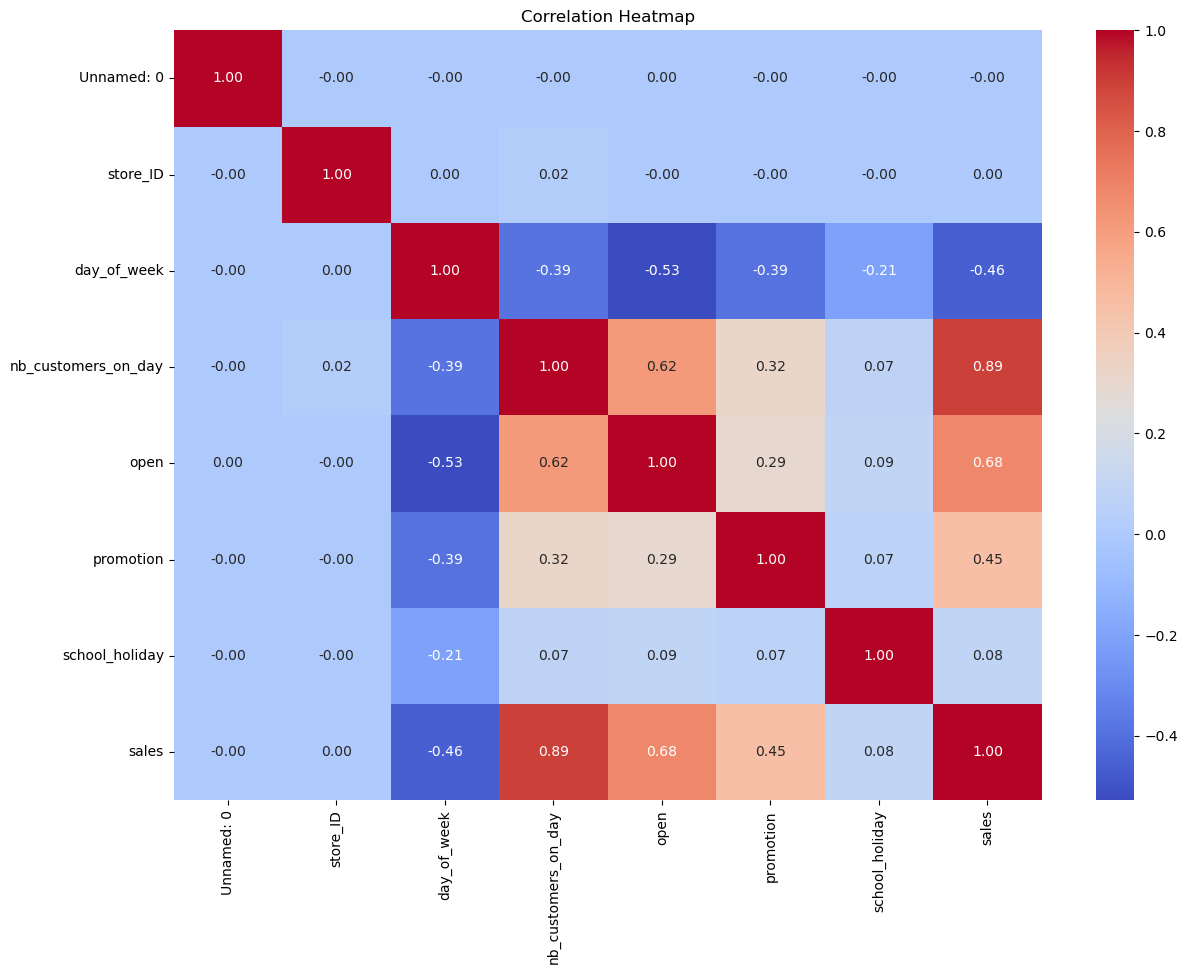

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 2. Linear Regression #2 / with Ridge

Ridge Regression 


In [154]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_train_ridge = ridge.predict(X_train)

from sklearn.metrics import r2_score 
r2_train_ridge = r2_score(y_train, y_pred_train_ridge) 

print(f"r^2 model #2 / Ridgle for training set is {r2_train_ridge}")

r^2 model #2 / Ridgle for training set is 1.0


In [155]:
y_pred_train = df_data_model.predict(X_train)
y_pred_test = df_data_model.predict(X_test)

# 3. Linear Regression #3 / with Lasso

In [156]:

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred_train_lasso = lasso.predict(X_train)

from sklearn.metrics import r2_score 
r2_train_lasso = r2_score(y_train, y_pred_train_lasso) 

print(f"r^2 model #3 / Lasso for training set is {r2_train_lasso}")

r^2 model #3 / Lasso for training set is 0.9999999996266126


# 4. RandomForrest #4


In [157]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Create and train the model
df_sales__forrest = RandomForestRegressor(random_state=42)
df_sales__forrest.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_forrest = df_sales__forrest.predict(X_test)

# Calculate R² to evaluate the model
r2 = r2_score(y_test, y_pred_forrest)
print(f"\nModel R² on validation data: {r2}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Model R² on validation data: 0.9999956864972647


# Testing with the real-life Data

Reading the data:

In [158]:
df_real = pd.read_csv("REAL_DATA.csv", delimiter=",")
df_real[0:5]

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,272371,415,7,01/03/2015,0,0,0,0,0
1,558468,27,7,29/12/2013,0,0,0,0,0
2,76950,404,3,19/03/2014,657,1,1,0,0
3,77556,683,2,29/01/2013,862,1,0,0,0
4,456344,920,3,19/03/2014,591,1,1,0,0


In [159]:
df_real.describe

<bound method NDFrame.describe of         index  store_ID  day_of_week        date  nb_customers_on_day  open  \
0      272371       415            7  01/03/2015                    0     0   
1      558468        27            7  29/12/2013                    0     0   
2       76950       404            3  19/03/2014                  657     1   
3       77556       683            2  29/01/2013                  862     1   
4      456344       920            3  19/03/2014                  591     1   
...       ...       ...          ...         ...                  ...   ...   
71200   59062       441            7  26/10/2014                    0     0   
71201  687449       377            7  18/08/2013                    0     0   
71202  207393        15            3  11/06/2014                  648     1   
71203  233378       950            2  23/04/2013                  626     1   
71204   85695       932            4  21/11/2013                  828     1   

       promotion 

Take of the / from the dates and delete month and day:

In [160]:
df_real['date'] = df_real['date'].str.replace('/', '')
df_real['date'] = df_real['date'].str[-4:]
df_real.head()

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,272371,415,7,2015,0,0,0,0,0
1,558468,27,7,2013,0,0,0,0,0
2,76950,404,3,2014,657,1,1,0,0
3,77556,683,2,2013,862,1,0,0,0
4,456344,920,3,2014,591,1,1,0,0


In [ ]:
from sklearn import model_selection
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, tree, svm, metrics
from sklearn.metrics import r2_score
# Initialize an array to hold the  r2_scores for each fold and model
r2 = np.zeros((10,4))
# Create a KFold object for 10-fold cross-validation
kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
# Get the number of splits (this line can be omitted as we don't use its result directly)
kf.get_n_splits()
# Loop counter
i = 0
# Iterate over each fold defined by KFold
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets based on the current fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Initialize regressor
    LR = LinearRegression()
    ridge = Ridge(alpha=1.0)
    lasso = Lasso(alpha=0.1)
    forest = RandomForestRegressor(random_state=42)
    # Train each regressor on the training set
    LR.fit(X_train, y_train)
    lasso.fit(X_train, y_train)
    ridge.fit(X_train, y_train)
    forest.fit(X_train, y_train)
    #.fit(X_train, y_train)
    # Make predictions on the testing set
    yhat_LR = LR.predict(X_test)
    yhat_lasso = lasso.predict(X_test)
    yhat_ridge = ridge.predict(X_test)
    yhat_forest = forest.predict(X_test)
    #yhat_ =
    #yhat_ =
    #yhat_ =
    # Calculate and store the accuracy for each classifier
    r2[i][0] = r2_score(yhat_LR, y_test)
    r2[i][0] = r2_score(yhat_lasso, y_test)
    r2[i][0] = r2_score(yhat_ridge, y_test)
    r2[i][0] = r2_score(yhat_forest, y_test)
    # Increment the loop counter
    i += 1
# Plotting the r2 score as a boxplot for each classifier
plt.boxplot(r2);
# Overlay individual r2 scores as red dots for better visualization
for i in range(4):
    xderiv = (i+1)*np.ones(r2[:,i].shape) + (np.random.rand(10,) - 0.5) * 0.1
    plt.plot(xderiv, r2[:,i], 'ro', alpha=0.3)
# Setting the labels for each regressor on the x-axis
ax = plt.gca()
ax.set_xticklabels(['LR'])
plt.xlabel('Regressor Type')
plt.ylabel('R2 Score')
plt.title('10-Fold Cross-Validation Results')
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Running the best model RandomForrest:

In [161]:
# Make predictions on the validation set
y_pred_forrest = df_sales__forrest.predict(df_real)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'a'